<a href="https://colab.research.google.com/github/connordfierro/TensorFlowUdacity/blob/main/Ch3ContdModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#from ch3 of Deep Learning w/ Python (Francois Chollet)


In [ ]:
#Classifying Movie Reviews (Binary Classification)
#IMDB Dataset: 50k reviews(50/50 +/-), 25k train/25k test split

In [1]:
#For kicks, here’s how you can quickly decode one of these reviews back to English words:
word_index = imdb.get_word_index()
reverse_word_index = dict(
#word_index is a dictionary mapping words to an integer index.
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

SyntaxError: ignored

In [2]:
from keras import layers, models
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
#(train/test)_(data/labels) can also be called (train/test)_(X/Y)
#num_words=10000 keeps 10k most frequently used words, discards rare ones
#in train/test_labels;0 = negative, 1 = positive


17473536/17464789 [==============================] - 0s 0us/step


In [4]:
#Next Step: turn lists into tensors
#can pad lists to same length, turn into int tensor(sample, word_index) -> Embedding Layer
#OR turn lists into 0/1s (One-hot encode) [ex 3,5 is 10k-D vector w/ 3/5 index of 1]
  #Then use Dense layer to handle float vector data
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
  results=np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.0
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype(np.float32)
y_test = np.asarray(test_labels).astype(np.float32)
#Now the data is ready to be inputted to a neural network


In [10]:
#3.4.3: Building the Network
#input: vector; output: scalar(1/0)
from keras import layers, models
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) #input_shape must be tuple (https://stackoverflow.com/questions/58635521/tensorflow-typeerror-int-object-is-not-iterable)
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
#You may remember from chapter 2 that each such Dense layer with a relu activation implements the following chain of tensor operations:
  #output = relu(dot(W, input) + b); W has shape(input_dimension, 16)
  #dot product projects input data to 16-D space, add bias vector(b), apply relu
#You can intuitively understand the dimensionality of your representation space as
#how much freedom you’re allowing the network to have when learning internal representations.
# Having more hidden units (a higher-dimensional representation space) allows
# your network to learn more-complex representations, but it makes the network 
#more computationally expensive and may lead to learning unwanted patterns (memorization)

#Two KEY DECISIONS about Dense Layer Stacks: 
  #The NUMBER of LAYERS, and the HIDDEN UNITS (neurons) for each LAYER.
#In this network, intermediate layers use RELU; final layer uses SIGMOID(1 unit)

#Activation functions are necessary to learn non-linear transformations.
#Without an AF, the output is linear(see output dot above)
#Using AFs massively increases HYPOTHESIS SPACE (as opposed to 16D linear(?) space)


In [ ]:
#Choosing an Optimizer
  #For binary classification (and probability output), use binary_crossentropy
  #means_squared_error could also tecnhically be used, but b_c is typically best
#rossentropy is a quantity from the field of Infor- mation Theory that measures
#the distance between probability distributions or, in this case, between the ground-truth distribution and your predictions.
#using rmsprop optimizer (accuracy monitored during training too)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
#parameters are passed as strings since they are part of Keras package


In [16]:
#custom losses/metrics using keras libraries
import tensorflow as tf #fix to make RMSprop work (added tf.keras, imported optimizers too)
from keras import losses, metrics, optimizers
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=.001), #lr=learning rate(?)
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [17]:
#Validation: set 10k samples apart from original training data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
#train model for 20 epochs (full iteration over all samples)
#in mini-batches of 512 samples, while monitoring loss/accuracy on 10k set apart
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy', 
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20, 
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 6s 40ms/step - loss: 0.5060 - acc: 0.7877 - val_loss: 0.3760 - val_acc: 0.8749
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2977 - acc: 0.9053 - val_loss: 0.3067 - val_acc: 0.8843
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2187 - acc: 0.9295 - val_loss: 0.2858 - val_acc: 0.8859
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1723 - acc: 0.9441 - val_loss: 0.2758 - val_acc: 0.8901
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1402 - acc: 0.9552 - val_loss: 0.2972 - val_acc: 0.8808
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1173 - acc: 0.9630 - val_loss: 0.2956 - val_acc: 0.8873
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0983 - acc: 0.9711 - val_loss: 0.3146 - val_acc: 0.8832
Epoch 8/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0788 - a

In [18]:
history_dict = history.history
history_dict.keys()
#Keys are metrics monitored during training/validation
#measured loss, accuracy, validation loss, and validation accuracy??

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

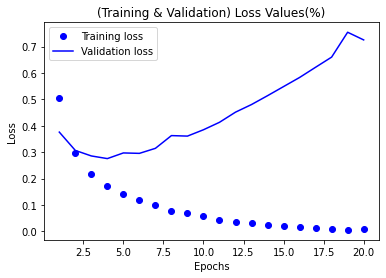

In [22]:
#Using Mpl to plot training/validation loss + accuracy
import matplotlib.pyplot as plt

loss_values = history_dict['loss']#Training
val_loss_values = history_dict['val_loss']#Test(?)

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')#bo = blue dot
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')#b=blue line
plt.title('(Training & Validation) Loss Values(%)') #is this actually percent?
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

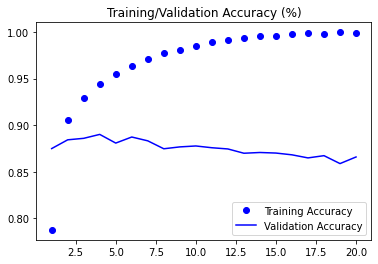

In [24]:
#Using mpl to plot training/validation Accuracy

plt.clf()
acc_values = history_dict['acc']#Training
val_acc_values = history_dict['val_acc']#Test(?)

plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training/Validation Accuracy (%)') #is this actually percent?
plt.legend()

plt.show()



In [29]:
#These Graphs indicate OVERFITTING: After epoch 2, model overoptimized on training data
#Here we are retraining the model then using test data to evaluate diff schema

#!!!!!!!DO NOT DO THIS!!!!!!!
#model.fit(x_train, y_train, epochs = 4, batch_size=512)
#results = model.evaluate(x_test, y_test)
#print(results)
#first results value is loss, second value is accuracy
#!!!!!!!DO NOT DO THIS!!!!!!!
#in order to get proper results, need to train a TOTALLY NEW network

In [30]:
#TOTALLY NEW Network, with only epochs changed from original setup (25 -> 4)
modeltwo = models.Sequential()
modeltwo.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
modeltwo.add(layers.Dense(16, activation='relu'))
modeltwo.add(layers.Dense(1, activation='sigmoid'))
modeltwo.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
modeltwo.fit(x_train, y_train, epochs=4, batch_size=512)
results = modeltwo.evaluate(x_test, y_test)
print(results)
#State-of the Art approaches should yield 95%+ Accuracy

Epoch 1/4
49/49 [==============================] - 1s 12ms/step - loss: 0.4648 - accuracy: 0.8204
Epoch 2/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2657 - accuracy: 0.9080
Epoch 3/4
49/49 [==============================] - 1s 13ms/step - loss: 0.2031 - accuracy: 0.9279
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.3159 - accuracy: 0.8743
[0.31585076451301575, 0.8743199706077576]


In [35]:
#Generate likelihood of positive reviews:
modeltwo.predict(x_test)
#array value indicates %likelihood review is POSITIVE (why not negative?/how to get neg?)

array([[0.17686665],
       [0.99963856],
       [0.80899554],
       ...,
       [0.08030719],
       [0.05504198],
       [0.47042286]], dtype=float32)

In [34]:
model.predict(x_test)

array([[0.24449244],
       [0.9994561 ],
       [0.9288494 ],
       ...,
       [0.17179596],
       [0.11339546],
       [0.6637346 ]], dtype=float32)

In [ ]:
The following experiments will help convince you that the architecture choices you’ve made are all fairly reasonable, although there’s still room for improvement:
 You used two hidden layers. Try using one or three hidden layers, and see how doing so affects validation and test accuracy.
 Try using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so on.
 Try using the mse loss function instead of binary_crossentropy.
 Try using the tanh activation (an activation that was popular in the early days of
neural networks) instead of relu.
#May have done this with Udacity Example; redo w/ this one?
Here’s what you should take away from this example:
 You usually need to do quite a bit of preprocessing on your raw data in order to be able to feed it—as tensors—into a neural network. Sequences of words can be encoded as binary vectors, but there are other encoding options, too.
 Stacks of Dense layers with relu activations can solve a wide range of problems (including sentiment classification), and you’ll likely use them frequently.
 In a binary classification problem (two output classes), your network should end with a Dense layer with one unit and a sigmoid activation: the output of your network should be a scalar between 0 and 1, encoding a probability.
 With such a scalar sigmoid output on a binary classification problem, the loss function you should use is binary_crossentropy.
 The rmsprop optimizer is generally a good enough choice, whatever your prob- lem. That’s one less thing for you to worry about.
 As they get better on their training data, neural networks eventually start over- fitting and end up obtaining increasingly worse results on data they’ve never seen before. Be sure to always monitor performance on data that is outside of the training set.

In [1]:
#EXAMPLE 2
#Classifying newswires (Single-Label Multiclass classification, using Reuters dataset)

#GETTING THE DATASET
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)
print ('Train data length:', len(train_data))
print('Test data length:', len(test_data))


Train data length: 8982
Test data length: 2246


In [2]:
train_data[10]
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in test_data[10]])
print(decoded_review)

? grain traders said they were still awaiting results of yesterday's u k intervention feed wheat tender for the home market the market sought to buy 340 000 tonnes more than double the remaining 150 000 tonnes available under the current tender however some of the tonnage included ? bids for supplies in the same stores since the tenders started last july ? 000 tonnes of british feed wheat have been sold back to the home market reuter 3


In [9]:
#ENCODING DATA/PREPROCESSING
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.0
  return results

x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

#vectorizing labels using One-Hot Encoding/CATEGORICAL encoding (see above explanation)
def to_one_hot(labels, dimension=46):
  results=np.zeros((len(sequences), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1
  return results

  one_hot_train_labels = to_one_hot(train_labels)
  one_hot_test_labels = to_one_hot(test_labels)


In [4]:
#CREATE NETWORK/MODEL
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))#input shape automatic from last layer
model.add(layers.Dense(46, activation='softmax'))
#46 is last layer to represent possible categories data can be labeled
#softmax activation for probability dist. over 46 categories (sum to 1)


In [5]:
#COMPILATION: 
#Best Loss Fxn for Single-Category Multiclass Problem is categorical_crossentropy
#CCE measures distance between probability dist. of network and TRUE dist\
#minimizing distance btwn 2 dists. trains network to output true label
from keras import optimizers, metrics, losses
model.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
#VALIDATION
#set apart 1k samples to use as validation
#TROUBLESHOOTING: including alternate way here from textbook
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)
#somehow this worked: Why do I need this code and not just one_hot_train??

x_validation = x_train[:1000]
partial_x_train = x_train[1000:]
y_validation = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]


In [14]:
#TRAINING: 
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size = 1024,
                    validation_data=(x_validation, y_validation))


Epoch 1/20
8/8 [==============================] - 3s 56ms/step - loss: 3.1738 - accuracy: 0.4401 - val_loss: 2.3792 - val_accuracy: 0.5870
Epoch 2/20
8/8 [==============================] - 0s 34ms/step - loss: 1.9503 - accuracy: 0.6351 - val_loss: 1.6768 - val_accuracy: 0.6690
Epoch 3/20
8/8 [==============================] - 0s 27ms/step - loss: 1.3988 - accuracy: 0.7260 - val_loss: 1.3738 - val_accuracy: 0.7190
Epoch 4/20
8/8 [==============================] - 0s 27ms/step - loss: 1.1033 - accuracy: 0.7828 - val_loss: 1.2127 - val_accuracy: 0.7370
Epoch 5/20
8/8 [==============================] - 0s 27ms/step - loss: 0.9257 - accuracy: 0.8113 - val_loss: 1.1349 - val_accuracy: 0.7590
Epoch 6/20
8/8 [==============================] - 0s 27ms/step - loss: 0.7775 - accuracy: 0.8398 - val_loss: 1.0595 - val_accuracy: 0.7690
Epoch 7/20
8/8 [==============================] - 0s 27ms/step - loss: 0.6702 - accuracy: 0.8617 - val_loss: 1.0080 - val_accuracy: 0.7820
Epoch 8/20
8/8 [===========

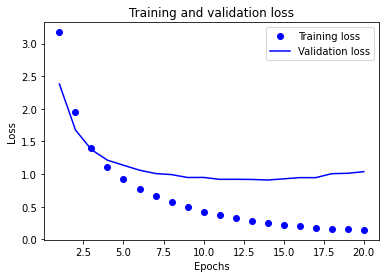

In [16]:
#VISUALIZING DATA (Validation Loss):
import matplotlib.pyplot as plt

loss=history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, validation_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


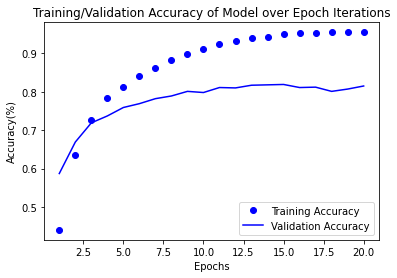

In [23]:
#VISUALIZING DATA(Accuracy):
#plt.clf() clears the figure
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss)+ 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training/Validation Accuracy of Model over Epoch Iterations')
plt.xlabel('Epochs')
plt.ylabel('Accuracy(%)')
plt.legend()
plt.show()

In [27]:
#GETTING BETTER RESULTS:
#Remake network with 9 epochs
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_validation, y_validation))
results = model.evaluate(x_test, one_hot_test_labels)
print('results:', results)

Epoch 1/9
16/16 [==============================] - 1s 28ms/step - loss: 2.6717 - accuracy: 0.5068 - val_loss: 1.8004 - val_accuracy: 0.6300
Epoch 2/9
16/16 [==============================] - 0s 15ms/step - loss: 1.4541 - accuracy: 0.6991 - val_loss: 1.3279 - val_accuracy: 0.7160
Epoch 3/9
16/16 [==============================] - 0s 14ms/step - loss: 1.0686 - accuracy: 0.7717 - val_loss: 1.1475 - val_accuracy: 0.7610
Epoch 4/9
16/16 [==============================] - 0s 15ms/step - loss: 0.8393 - accuracy: 0.8227 - val_loss: 1.0492 - val_accuracy: 0.7780
Epoch 5/9
16/16 [==============================] - 0s 15ms/step - loss: 0.6748 - accuracy: 0.8554 - val_loss: 0.9756 - val_accuracy: 0.8030
Epoch 6/9
16/16 [==============================] - 0s 15ms/step - loss: 0.5374 - accuracy: 0.8875 - val_loss: 0.9376 - val_accuracy: 0.8050
Epoch 7/9
16/16 [==============================] - 0s 14ms/step - loss: 0.4368 - accuracy: 0.9092 - val_loss: 0.9079 - val_accuracy: 0.8160
Epoch 8/9
16/16 [===

In [28]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)


0.18967052537845058

In [32]:
predictions = model.predict(x_test)
print('shape/vector length:', predictions[0].shape)
print('sum of vector coefficients:', np.sum(predictions[0]))
print('predicted class:', np.argmax(predictions[0]))

shape/vector length: (46,)
sum of vector coefficients: 1.0
predicted class: 3


In [33]:
#Encoding Labels as INT Tensors
#An Alternative way to encode labels (as opposed to OneHot Encoding???)
y_train = np.array(train_labels)
y_test = np.array(test_labels)

#Use sparse_categorical_crossentropy with integer labels
model.compile(optimizer = 'rmsprop',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])
#Same as Categorical_Crossentropy, but different Interface
#Reduced Size Networks (ex Dense(4, ...)) compresses/loses information
#into a space that is too low-dimensional to yield accurate results
#Further experiments
#Try using larger or smaller layers: 32 units, 128 units, and so on.
#You used two hidden layers. Now try using a single hidden layer, or three hidden layers.

In [ ]:
Wrapping up
Here’s what you should take away from this example:
 If you’re trying to classify data points among N classes, your network should end with a Dense layer of size N.
 In a single-label, multiclass classification problem, your network should end with a softmax activation so that it will output a probability distribution over the N output classes.
 Categorical crossentropy is almost always the loss function you should use for such problems. It minimizes the distance between the probability distributions output by the network and the true distribution of the targets.
 There are two ways to handle labels in multiclass classification:
– Encoding the labels via categorical encoding (also known as one-hot encod-
ing) and using categorical_crossentropy as a loss function
– Encoding the labels as integers and using the sparse_categorical_crossentropy
loss function
 If you need to classify data into a large number of categories, you should avoid
creating information bottlenecks in your network due to intermediate layers that are too small.
3.5.8


In [1]:
#EXAMPLE 3:
#Predicting House Prices (LINEAR REGRESSION)(using Boston Housing Price dataset)
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

print('traindatashape',train_data.shape)
print('testdatashape', test_data.shape)



traindatashape (404, 13)
testdatashape (102, 13)


In [2]:
#DATA PREPROCESSING/PREPARATION:
#FEATURE-WISE NORMALIZATION - for each input data feature, subtract mean of input,
#then divide by STDEV so each feature is centered around 0 w/ unit STDEV
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std



In [3]:
#BUILDING THE MODEL/NETWORK:
from keras import models, layers

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation = 'relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'], run_eagerly=True)
  return model
#model ends w/ single unit, NO activation (LINEAR layer) b/c constrains range
#typical setup for scalar regression
#IN COMPILE: mse=Mean Squared Error, mae = Mean Absolute Error (.5 = +/-500$ average error)


In [4]:
#VALIDATION USING K-FOLD (due to HIGH VARIANCE w/ regard to validation split)
#since validation set would be very small, scores change depending on sampled data
#Instead, K-FOLD CROSS-VALIDATION: split data into K partitions(typically k=4 or 5)
#instantiate K identical models, train on K-1 partitions while evaluating on remaining partition (test partition)
#Validation Score is AVG of K validation scores obtained.
import numpy as np
import tensorflow as tf

k = 4
num_val_samples = len(train_data) 
num_epochs = 100
all_scores = []

for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

  partial_train_data = np.concatenate(
      [train_data[:i * num_val_samples],
       train_data[(i + 1) * num_val_samples:]],
       axis=0)
  partial_train_targets = np.concatenate(
      [train_targets[:i * num_val_samples],
       train_targets[(i + 1) * num_val_samples:]],
       axis=0)
  
  model = build_model()
  model.fit(partial_train_data, partial_train_targets, epochs=num_epochs,
            batch_size = 1, verbose = 0)
  tf.config.run_functions_eagerly(True)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)
  

processing fold # 0


ValueError: ignored

In [5]:
import numpy as np
k=4
num_val_samples = len(train_data)
num_epochs = 100
all_scores = []

for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples] 
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

  partial_train_data = np.concatenate( [train_data[:i * num_val_samples],
    train_data[(i + 1) * num_val_samples:]], axis=0)

  partial_train_targets = np.concatenate( [train_targets[:i * num_val_samples],
    train_targets[(i + 1) * num_val_samples:]], axis=0)

  model = build_model()
  model.fit(partial_train_data, partial_train_targets,
            epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)

processing fold # 0


ValueError: ignored

In [ ]:
#stopped on pg 89 b/c of EMPTY LOGS error

In [ ]:
for i in range(k):
print('processing fold #', i)
val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples] val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
partial_train_data = np.concatenate( [train_data[:i * num_val_samples],
train_data[(i + 1) * num_val_samples:]], axis=0)
partial_train_targets = np.concatenate( [train_targets[:i * num_val_samples],
train_targets[(i + 1) * num_val_samples:]], axis=0)
model = build_model()
model.fit(partial_train_data, partial_train_targets,
Builds the Keras model (already compiled)
Trains the model (in silent mode, verbose = 0)
  epochs=num_epochs, batch_size=1, verbose=0)
val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
all_scores.append(val_mae)


In [ ]:
num_epochs = 500 all_mae_histories = [] for i in range(k):
Prepares the validation data: data from partition #k
 print('processing fold #', i)
val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples] val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
partial_train_data = np.concatenate( [train_data[:i * num_val_samples],
train_data[(i + 1) * num_val_samples:]], axis=0)
Prepares the training data: data from all other partitions

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()


In [ ]:
model = build_model()
model.fit(train_data, train_targets,
Gets a fresh, compiled model
Trains it on the entirety of the data
epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

In [ ]:
3.6.5 Wrapping up
Here’s what you should take away from this example:
 Regression is done using different loss functions than what we used for classifi- cation. Mean squared error (MSE) is a loss function commonly used for regres- sion.
 Similarly, evaluation metrics to be used for regression differ from those used for classification; naturally, the concept of accuracy doesn’t apply for regression. A common regression metric is mean absolute error (MAE).
 When features in the input data have values in different ranges, each feature should be scaled independently as a preprocessing step.
 When there is little data available, using K-fold validation is a great way to reli- ably evaluate a model.
 When little training data is available, it’s preferable to use a small network with few hidden layers (typically only one or two), in order to avoid severe overfitting.